In [1]:
#Make SI WIMP sensitivity plot

In [ ]:
#Imports
from mpmath import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.optimize import curve_fit
from scipy.special import erf

from numpy import vectorize


%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")


In [3]:
#Cross-section limits from XENON1t data
const = 1#1e36 #cm2 to pb for neutrino floor plotting

Xe1t_WIMP_mass_array = np.asarray([5.93, 6.24, 6.49, 6.76, 7.17, 7.52, 7.90, 8.30, 8.91, 9.86, 10.99, 12.12, 13.59, 14.79, 16.37, 18.37, 20.67, 23.25, 26.41, 30.05, 33.10, 37.58, 42.98, 49.37, 55.67, 63.36, 71.10, 86.02, 105.30, 139.97, 172.56, 232.63, 288.15, 363.71, 475.55, 630.62, 816.83, 963.01])
Xe1t_XSection_array = const*np.asarray([2.34E-44, 1.70E-44, 1.13E-44, 7.53E-45, 4.58E-45, 3.21E-45, 2.26E-45, 1.61E-45, 1.03E-45, 5.75E-46, 3.45E-46, 2.30E-46, 1.50E-46, 1.15E-46, 8.70E-47, 6.66E-47, 5.46E-47, 4.82E-47, 4.39E-47, 4.25E-47, 4.25E-47, 4.47E-47, 4.79E-47, 5.29E-47, 5.81E-47, 6.51E-47, 7.06E-47, 8.46E-47, 1.01E-46, 1.29E-46, 1.57E-46, 2.09E-46, 2.62E-46, 3.23E-46, 4.23E-46, 5.67E-46, 7.33E-46, 8.67E-46] )     

"""
@article{Apr18,
    author = "Aprile, E. and others",
    archivePrefix = "arXiv",
    collaboration = "XENON",
    doi = "10.1103/PhysRevLett.121.111302",
    eprint = "1805.12562",
    journal = "Phys.\ Rev.\ Lett.",
    number = "11",
    pages = "111302",
    primaryClass = "astro-ph.CO",
    title = "{Dark Matter Search Results from a One Ton-Year Exposure of XENON1T}",
    volume = "121",
    year = "2018"
}
"""

#LUX18_WIMP_mass_array = np.asarray([3.50E+00, 3.54E+00, 3.59E+00, 3.64E+00, 3.69E+00, 3.75E+00, 3.83E+00, 3.91E+00, 4.01E+00, 4.12E+00, 4.23E+00, 4.36E+00, 4.51E+00, 4.67E+00, 4.85E+00, 5.05E+00, 5.26E+00, 5.48E+00, 5.73E+00, 6.03E+00, 6.39E+00, 6.79E+00, 7.27E+00, 7.83E+00, 8.38E+00, 8.77E+00, 9.13E+00, 9.43E+00, 9.73E+00, 9.98E+00])
#LUX18_XSection_array = const*np.asarray([2.83E-39, 1.66E-39, 8.12E-40, 4.94E-40, 3.02E-40, 1.72E-40, 9.45E-41, 5.78E-41, 3.29E-41, 1.86E-41, 1.10E-41, 6.48E-42, 3.75E-42, 2.33E-42, 1.38E-42, 8.16E-43, 4.99E-43, 3.08E-43, 1.91E-43, 1.13E-43, 6.94E-44, 4.22E-44, 2.56E-44, 1.54E-44, 1.02E-44, 7.95E-45, 6.46E-45, 5.58E-45, 4.82E-45, 4.34E-45]) 


#LUX17_WIMP_mass_array = np.asarray([1.34E+00, 1.36E+00, 1.38E+00, 1.39E+00, 1.40E+00, 1.41E+00, 1.44E+00, 1.46E+00, 1.50E+00, 1.51E+00, 1.55E+00, 1.58E+00, 1.63E+00, 1.67E+00, 1.69E+00, 1.74E+00, 1.78E+00, 1.84E+00, 1.89E+00, 1.96E+00, 2.03E+00, 2.13E+00, 2.24E+00, 2.33E+00, 2.45E+00, 2.54E+00, 2.65E+00, 2.79E+00, 2.93E+00, 3.14E+00, 3.31E+00, 3.55E+00, 3.76E+00, 4.06E+00, 4.24E+00, 4.52E+00, 4.84E+00, 5.14E+00, 5.48E+00, 5.96E+00, 6.53E+00, 7.23E+00, 7.84E+00, 8.67E+00, 9.66E+00, 1.05E+01, 1.17E+01, 1.28E+01, 1.35E+01, 1.44E+01, 1.59E+01, 1.78E+01, 1.93E+01, 2.15E+01, 2.42E+01, 2.69E+01, 2.99E+01, 3.39E+01, 3.80E+01, 4.25E+01, 4.82E+01, 5.53E+01, 6.33E+01, 7.07E+01, 7.92E+01, 8.63E+01, 9.66E+01, 1.09E+02, 1.22E+02, 1.33E+02, 1.49E+02, 1.70E+02, 1.96E+02, 2.20E+02, 2.50E+02, 2.90E+02, 3.31E+02, 3.85E+02, 4.29E+02, 4.94E+02, 5.70E+02, 6.47E+02, 7.47E+02, 8.39E+02, 9.55E+02, 1.06E+03, 1.20E+03, 1.40E+03, 1.57E+03, 1.77E+03, 2.04E+03, 2.31E+03, 2.60E+03, 2.93E+03, 3.35E+03, 3.95E+03, 4.89E+03, 5.62E+03, 6.52E+03, 7.56E+03, 8.69E+03, 9.98E+03, 1.16E+04, 1.38E+04, 1.60E+04, 1.84E+04, 2.14E+04, 2.50E+04, 2.92E+04, 3.38E+04, 4.04E+04, 4.70E+04, 5.50E+04, 6.37E+04, 7.33E+04, 8.33E+04, 9.30E+04, 9.87E+04])    
#LUX17_XSection_array = const*np.asarray([1.00E-42, 8.74E-43, 7.39E-43, 6.18E-43, 5.23E-43, 4.45E-43, 3.71E-43, 2.97E-43, 2.40E-43, 1.86E-43, 1.36E-43, 1.01E-43, 7.74E-44, 6.16E-44, 4.93E-44, 3.79E-44, 3.01E-44, 2.34E-44, 1.87E-44, 1.44E-44, 1.13E-44, 8.42E-45, 6.30E-45, 5.05E-45, 3.97E-45, 3.29E-45, 2.70E-45, 2.17E-45, 1.71E-45, 1.32E-45, 1.08E-45, 8.68E-46, 7.15E-46, 5.95E-46, 5.23E-46, 4.40E-46, 3.76E-46, 3.26E-46, 2.83E-46, 2.47E-46, 2.17E-46, 1.90E-46, 1.71E-46, 1.52E-46, 1.37E-46, 1.25E-46, 1.14E-46, 1.08E-46, 1.05E-46, 1.05E-46, 1.09E-46, 1.12E-46, 1.17E-46, 1.22E-46, 1.29E-46, 1.36E-46, 1.44E-46, 1.54E-46, 1.67E-46, 1.79E-46, 1.95E-46, 2.16E-46, 2.39E-46, 2.58E-46, 2.84E-46, 3.05E-46, 3.35E-46, 3.72E-46, 4.10E-46, 4.39E-46, 4.93E-46, 5.50E-46, 6.29E-46, 6.94E-46, 7.78E-46, 8.87E-46, 9.97E-46, 1.15E-45, 1.28E-45, 1.44E-45, 1.65E-45, 1.83E-45, 2.09E-45, 2.32E-45, 2.61E-45, 2.87E-45, 3.18E-45, 3.62E-45, 4.03E-45, 4.50E-45, 5.07E-45, 5.67E-45, 6.27E-45, 6.99E-45, 7.77E-45, 8.97E-45, 1.08E-44, 1.22E-44, 1.40E-44, 1.60E-44, 1.80E-44, 2.04E-44, 2.32E-44, 2.73E-44, 3.10E-44, 3.50E-44, 4.01E-44, 4.61E-44, 5.27E-44, 6.03E-44, 7.04E-44, 8.04E-44, 9.25E-44, 1.05E-43, 1.19E-43, 1.32E-43, 1.46E-43, 1.52E-43])   
   
LUX17_WIMP_mass_array = np.asarray([5.22E+00, 5.26E+00, 5.30E+00, 5.38E+00, 5.44E+00, 5.48E+00, 5.58E+00, 5.67E+00, 5.71E+00, 5.80E+00, 5.86E+00, 6.00E+00, 6.06E+00, 6.15E+00, 6.25E+00, 6.32E+00, 6.44E+00, 6.56E+00, 6.68E+00, 6.76E+00, 6.97E+00, 7.07E+00, 7.18E+00, 7.31E+00, 7.48E+00, 7.68E+00, 7.86E+00, 8.07E+00, 8.28E+00, 8.50E+00, 8.73E+00, 9.06E+00, 9.41E+00, 9.77E+00, 1.01E+01, 1.04E+01, 1.09E+01, 1.13E+01, 1.18E+01, 1.23E+01, 1.28E+01, 1.34E+01, 1.41E+01, 1.47E+01, 1.55E+01, 1.62E+01, 1.69E+01, 1.77E+01, 1.87E+01, 1.99E+01, 2.14E+01, 2.30E+01, 2.49E+01, 2.71E+01, 2.96E+01, 3.16E+01, 3.46E+01, 3.80E+01, 3.95E+01, 4.42E+01, 4.79E+01, 5.28E+01, 5.89E+01, 6.52E+01, 7.08E+01, 8.02E+01, 8.78E+01, 9.65E+01, 1.04E+02, 1.16E+02, 1.25E+02, 1.38E+02, 1.51E+02, 1.67E+02, 1.81E+02, 2.01E+02, 2.26E+02, 2.55E+02, 2.86E+02, 3.30E+02, 3.67E+02, 4.12E+02, 4.63E+02, 5.20E+02, 6.01E+02, 6.85E+02, 7.70E+02, 8.69E+02, 9.66E+02, 1.09E+03, 1.26E+03, 1.48E+03, 1.71E+03, 1.92E+03, 2.19E+03, 2.51E+03, 2.87E+03, 3.28E+03, 3.70E+03, 4.31E+03, 5.03E+03, 5.81E+03, 6.86E+03, 7.95E+03, 9.27E+03, 1.09E+04, 1.25E+04, 1.46E+04, 1.70E+04, 2.02E+04, 2.37E+04, 2.78E+04, 3.33E+04, 3.91E+04, 4.66E+04, 5.50E+04, 6.39E+04, 7.54E+04, 8.61E+04, 9.93E+04])        
LUX17_XSection_array = const*1e-45*np.asarray([1.00E+03, 8.73E+02, 7.20E+02, 5.98E+02, 4.83E+02, 3.95E+02, 3.27E+02, 2.69E+02, 2.27E+02, 1.84E+02, 1.50E+02, 1.21E+02, 9.78E+01, 7.87E+01, 6.59E+01, 5.41E+01, 4.63E+01, 3.81E+01, 3.09E+01, 2.69E+01, 2.21E+01, 1.84E+01, 1.59E+01, 1.39E+01, 1.16E+01, 9.53E+00, 7.94E+00, 6.76E+00, 5.50E+00, 4.75E+00, 4.09E+00, 3.41E+00, 2.82E+00, 2.30E+00, 1.93E+00, 1.66E+00, 1.34E+00, 1.14E+00, 9.62E-01, 8.36E-01, 7.19E-01, 6.16E-01, 5.41E-01, 4.75E-01, 4.13E-01, 3.61E-01, 3.22E-01, 2.89E-01, 2.59E-01, 2.35E-01, 2.09E-01, 1.88E-01, 1.68E-01, 1.49E-01, 1.35E-01, 1.25E-01, 1.15E-01, 1.07E-01, 1.04E-01, 1.05E-01, 1.09E-01, 1.14E-01, 1.21E-01, 1.26E-01, 1.34E-01, 1.43E-01, 1.53E-01, 1.62E-01, 1.71E-01, 1.84E-01, 1.98E-01, 2.13E-01, 2.32E-01, 2.52E-01, 2.72E-01, 2.98E-01, 3.36E-01, 3.77E-01, 4.24E-01, 4.88E-01, 5.47E-01, 6.20E-01, 6.91E-01, 7.82E-01, 9.04E-01, 1.04E+00, 1.17E+00, 1.32E+00, 1.46E+00, 1.66E+00, 1.93E+00, 2.26E+00, 2.63E+00, 2.96E+00, 3.37E+00, 3.86E+00, 4.41E+00, 5.05E+00, 5.69E+00, 6.57E+00, 7.76E+00, 8.88E+00, 1.05E+01, 1.21E+01, 1.41E+01, 1.66E+01, 1.91E+01, 2.24E+01, 2.58E+01, 3.09E+01, 3.67E+01, 4.22E+01, 5.06E+01, 5.97E+01, 7.12E+01, 8.45E+01, 9.77E+01, 1.15E+02, 1.31E+02, 1.51E+02])     

"""
@article{Ake17,
    author = "Akerib, D.S. and others",
    archivePrefix = "arXiv",
    collaboration = "LUX",
    doi = "10.1103/PhysRevLett.118.021303",
    eprint = "1608.07648",
    journal = "Phys.\ Rev.\ Lett.",
    number = "2",
    pages = "021303",
    primaryClass = "astro-ph.CO",
    title = "{Results from a search for dark matter in the complete LUX exposure}",
    volume = "118",
    year = "2017"
}
"""

PdaX_WIMP_mass_array = np.asarray([8.05E+00, 8.20E+00, 8.41E+00, 8.58E+00, 8.80E+00, 9.03E+00, 9.31E+00, 9.59E+00, 9.89E+00, 1.02E+01, 1.05E+01, 1.08E+01, 1.12E+01, 1.15E+01, 1.19E+01, 1.23E+01, 1.27E+01, 1.31E+01, 1.37E+01, 1.43E+01, 1.47E+01, 1.53E+01, 1.62E+01, 1.69E+01, 1.76E+01, 1.85E+01, 1.95E+01, 2.07E+01, 2.27E+01, 2.54E+01, 2.87E+01, 3.34E+01, 3.95E+01, 4.67E+01, 5.52E+01, 6.52E+01, 7.64E+01, 8.97E+01, 1.04E+02, 1.19E+02, 1.36E+02, 1.58E+02, 1.86E+02, 2.15E+02, 2.42E+02, 2.74E+02, 3.09E+02, 3.49E+02, 3.91E+02, 4.35E+02, 4.84E+02, 5.46E+02, 6.26E+02, 7.17E+02, 8.16E+02, 9.15E+02, 1.03E+03, 1.16E+03, 1.32E+03, 1.51E+03, 1.72E+03, 1.95E+03, 2.22E+03, 2.51E+03, 2.86E+03, 3.25E+03, 3.70E+03, 4.21E+03, 4.75E+03, 5.36E+03, 6.05E+03, 6.78E+03, 7.54E+03, 8.39E+03, 9.12E+03])    
PdaX_XSection_array = const*np.asarray([9.64E-45, 8.48E-45, 7.33E-45, 6.20E-45, 5.38E-45, 4.50E-45, 3.71E-45, 3.07E-45, 2.57E-45, 2.17E-45, 1.85E-45, 1.59E-45, 1.37E-45, 1.19E-45, 1.06E-45, 8.55E-46, 7.35E-46, 6.47E-46, 5.59E-46, 4.85E-46, 4.13E-46, 3.58E-46, 3.13E-46, 2.75E-46, 2.43E-46, 2.14E-46, 1.86E-46, 1.62E-46, 1.41E-46, 1.20E-46, 1.06E-46, 9.42E-47, 8.63E-47, 8.70E-47, 9.04E-47, 9.68E-47, 1.06E-46, 1.17E-46, 1.30E-46, 1.47E-46, 1.66E-46, 1.88E-46, 2.11E-46, 2.38E-46, 2.67E-46, 3.02E-46, 3.41E-46, 3.88E-46, 4.37E-46, 4.92E-46, 5.52E-46, 6.22E-46, 7.05E-46, 8.01E-46, 9.08E-46, 1.02E-45, 1.15E-45, 1.30E-45, 1.47E-45, 1.66E-45, 1.87E-45, 2.11E-45, 2.38E-45, 2.68E-45, 3.02E-45, 3.42E-45, 3.86E-45, 4.36E-45, 4.92E-45, 5.58E-45, 6.35E-45, 7.15E-45, 8.04E-45, 9.05E-45, 9.74E-45])     
"""
@article{Cui17,
    author = "Cui, Xiangyi and others",
    archivePrefix = "arXiv",
    collaboration = "PandaX-II",
    doi = "10.1103/PhysRevLett.119.181302",
    eprint = "1708.06917",
    journal = "Phys.\ Rev.\ Lett.",
    number = "18",
    pages = "181302",
    primaryClass = "astro-ph.CO",
    title = "{Dark Matter Results From 54-Ton-Day Exposure of PandaX-II Experiment}",
    volume = "119",
    year = "2017"
}
"""

LZ18_WIMP_mass_array = np.asarray([3.06E+00, 3.14E+00, 3.23E+00, 3.32E+00, 3.41E+00, 3.52E+00, 3.63E+00, 3.75E+00, 3.86E+00, 4.01E+00, 4.18E+00, 4.37E+00, 4.53E+00, 4.75E+00, 4.95E+00, 5.15E+00, 5.39E+00, 5.56E+00, 5.77E+00, 6.02E+00, 6.34E+00, 6.71E+00, 7.12E+00, 7.47E+00, 7.91E+00, 8.39E+00, 8.96E+00, 9.55E+00, 1.02E+01, 1.09E+01, 1.15E+01, 1.24E+01, 1.33E+01, 1.46E+01, 1.57E+01, 1.68E+01, 1.80E+01, 1.93E+01, 2.08E+01, 2.23E+01, 2.41E+01, 2.63E+01, 2.89E+01, 3.14E+01, 3.48E+01, 3.98E+01, 4.75E+01, 5.31E+01, 5.98E+01, 6.70E+01, 7.37E+01, 8.25E+01, 9.36E+01, 1.05E+02, 1.21E+02, 1.41E+02, 1.65E+02, 1.88E+02, 2.22E+02, 2.53E+02, 2.87E+02, 3.26E+02, 3.76E+02, 4.20E+02, 4.69E+02, 5.34E+02, 6.08E+02, 7.11E+02, 8.01E+02, 9.20E+02, 1.03E+03, 1.20E+03, 1.39E+03, 1.58E+03, 1.77E+03, 1.99E+03])     
LZ18_XSection_array = const*np.asarray([9.70E-43, 7.24E-43, 5.01E-43, 3.68E-43, 2.67E-43, 1.90E-43, 1.32E-43, 9.21E-44, 6.81E-44, 4.56E-44, 2.94E-44, 1.93E-44, 1.33E-44, 8.67E-45, 5.98E-45, 4.19E-45, 2.85E-45, 2.16E-45, 1.57E-45, 1.10E-45, 7.18E-46, 4.35E-46, 2.72E-46, 1.83E-46, 1.18E-46, 7.71E-47, 4.91E-47, 3.31E-47, 2.32E-47, 1.60E-47, 1.19E-47, 8.67E-48, 6.53E-48, 4.83E-48, 3.96E-48, 3.35E-48, 2.86E-48, 2.48E-48, 2.20E-48, 1.99E-48, 1.79E-48, 1.66E-48, 1.56E-48, 1.50E-48, 1.50E-48, 1.46E-48, 1.47E-48, 1.49E-48, 1.57E-48, 1.67E-48, 1.78E-48, 1.92E-48, 2.10E-48, 2.30E-48, 2.60E-48, 2.90E-48, 3.30E-48, 3.70E-48, 4.23E-48, 4.72E-48, 5.23E-48, 5.84E-48, 6.61E-48, 7.32E-48, 8.00E-48, 8.93E-48, 1.02E-47, 1.18E-47, 1.33E-47, 1.51E-47, 1.71E-47, 1.99E-47, 2.32E-47, 2.69E-47, 3.05E-47, 3.48E-47])       

"""
@article{Ake20,
    author = "Akerib, D.S. and others",
    archivePrefix = "arXiv",
    collaboration = "LUX-ZEPLIN",
    doi = "10.1103/PhysRevD.101.052002",
    eprint = "1802.06039",
    journal = "Phys.\ Rev.\ D",
    number = "5",
    pages = "052002",
    primaryClass = "astro-ph.IM",
    reportNumber = "FERMILAB-PUB-18-054-AE-PPD",
    title = "{Projected WIMP sensitivity of the LUX-ZEPLIN dark matter experiment}",
    volume = "101",
    year = "2020"
}
"""

sCDMS_WIMP_mass_array = np.asarray([4.09E-01, 4.17E-01, 4.21E-01, 4.30E-01, 4.33E-01, 4.42E-01, 4.49E-01, 4.70E-01, 4.78E-01, 5.09E-01, 5.22E-01, 5.66E-01, 5.85E-01, 6.41E-01, 6.45E-01, 6.72E-01, 6.93E-01, 7.52E-01, 7.76E-01, 8.53E-01, 8.89E-01, 9.88E-01, 1.03E+00, 1.16E+00, 1.21E+00, 1.37E+00, 1.43E+00, 1.62E+00, 1.70E+00, 1.93E+00, 2.02E+00, 2.29E+00, 2.40E+00, 2.73E+00, 2.87E+00, 3.25E+00, 3.42E+00, 3.87E+00, 4.06E+00, 4.61E+00, 4.84E+00, 5.21E+00, 5.75E+00, 5.98E+00, 6.66E+00, 6.93E+00, 7.71E+00, 8.05E+00, 9.03E+00, 9.42E+00, 9.99E+00])      
sCDMS_XSection_array = const*np.asarray([2.12E-39, 1.01E-39, 6.90E-40, 3.15E-40, 2.22E-40, 9.90E-41, 7.23E-41, 3.39E-41, 2.48E-41, 1.23E-41, 9.26E-42, 4.91E-42, 3.84E-42, 2.27E-42, 2.19E-42, 1.49E-42, 1.14E-42, 6.13E-43, 4.84E-43, 2.77E-43, 2.30E-43, 1.48E-43, 1.28E-43, 9.02E-44, 8.26E-44, 6.26E-44, 5.70E-44, 4.66E-44, 4.43E-44, 3.99E-44, 3.83E-44, 3.64E-44, 3.58E-44, 3.54E-44, 3.58E-44, 3.67E-44, 3.75E-44, 3.95E-44, 4.13E-44, 4.60E-44, 4.82E-44, 5.15E-44, 3.18E-44, 2.58E-44, 1.66E-44, 1.40E-44, 8.89E-45, 7.70E-45, 5.26E-45, 4.67E-45, 4.04E-45])       

"""
@article{Agn17,
    author = "Agnese, R. and others",
    archivePrefix = "arXiv",
    collaboration = "SuperCDMS",
    doi = "10.1103/PhysRevD.95.082002",
    eprint = "1610.00006",
    journal = "Phys.\ Rev.\ D",
    number = "8",
    pages = "082002",
    primaryClass = "physics.ins-det",
    reportNumber = "FERMILAB-PUB-16-467-AE",
    title = "{Projected Sensitivity of the SuperCDMS SNOLAB experiment}",
    volume = "95",
    year = "2017"
}
"""
#neut_WIMP_mass_array = np.asarray([7.93E-02, 9.87E-02, 1.23E-01, 1.53E-01, 1.92E-01, 2.42E-01, 3.00E-01, 3.70E-01, 4.77E-01, 5.94E-01, 7.39E-01, 9.18E-01, 1.18E+00, 1.43E+00, 1.74E+00, 2.16E+00, 2.59E+00, 2.77E+00, 2.89E+00, 3.01E+00, 3.18E+00, 3.42E+00, 3.76E+00, 4.20E+00, 4.78E+00, 5.66E+00, 6.97E+00, 8.67E+00, 1.08E+01, 1.34E+01, 1.67E+01, 2.05E+01, 2.70E+01, 3.36E+01, 4.19E+01, 5.17E+01, 6.63E+01, 8.99E+01, 1.12E+02, 1.46E+02, 1.93E+02, 2.41E+02, 2.91E+02, 3.64E+02, 4.57E+02, 5.71E+02, 7.10E+02, 8.85E+02, 1.01E+03])
#neut_XSection_array = const*np.asarray([4.98E-44, 4.29E-44, 4.51E-44, 3.57E-44, 2.21E-44, 1.40E-44, 8.18E-45, 5.40E-45, 3.54E-45, 3.15E-45, 2.92E-45, 2.82E-45, 3.08E-45, 3.31E-45, 3.69E-45, 4.21E-45, 2.73E-45, 1.01E-45, 3.10E-46, 9.04E-47, 2.91E-47, 1.08E-47, 4.36E-48, 1.75E-48, 7.41E-49, 3.26E-49, 1.68E-49, 1.10E-49, 8.49E-50, 7.47E-50, 7.22E-50, 7.60E-50, 1.06E-49, 1.27E-49, 1.54E-49, 1.96E-49, 2.74E-49, 3.11E-49, 3.65E-49, 4.45E-49, 5.26E-49, 6.22E-49, 7.29E-49, 8.80E-49, 1.05E-48, 1.28E-48, 1.51E-48, 1.84E-48, 1.93E-48])
neut_WIMP_mass_array = np.asarray([3.22E-01, 3.73E-01, 4.33E-01, 5.03E-01, 5.84E-01, 6.77E-01, 7.86E-01, 9.12E-01, 1.04E+00, 1.21E+00, 1.46E+00, 1.73E+00, 2.00E+00, 2.31E+00, 2.69E+00, 3.16E+00, 3.63E+00, 4.21E+00, 4.85E+00, 5.94E+00, 6.54E+00, 6.71E+00, 6.88E+00, 7.03E+00, 7.22E+00, 7.44E+00, 7.75E+00, 8.14E+00, 8.75E+00, 9.37E+00, 1.01E+01, 1.11E+01, 1.26E+01, 1.46E+01, 1.70E+01, 1.97E+01, 2.29E+01, 2.66E+01, 3.08E+01, 3.55E+01, 4.26E+01, 4.91E+01, 5.67E+01, 6.58E+01, 7.55E+01, 8.96E+01, 1.02E+02, 1.26E+02, 1.49E+02, 1.86E+02, 2.13E+02, 2.53E+02, 3.02E+02, 3.49E+02, 4.06E+02, 4.81E+02, 5.61E+02, 6.48E+02, 7.52E+02, 8.72E+02, 9.72E+02])
neut_XSection_array = const*np.asarray([5.16E-44, 4.38E-44, 4.49E-44, 4.46E-44, 3.42E-44, 2.33E-44, 1.68E-44, 1.13E-44, 7.54E-45, 5.43E-45, 3.68E-45, 3.23E-45, 3.01E-45, 2.85E-45, 2.86E-45, 3.04E-45, 3.25E-45, 3.61E-45, 4.02E-45, 3.53E-45, 2.00E-45, 8.71E-46, 4.35E-46, 1.86E-46, 7.36E-47, 3.64E-47, 1.77E-47, 8.83E-48, 4.07E-48, 2.10E-48, 1.10E-48, 5.65E-49, 2.87E-49, 1.67E-49, 1.16E-49, 9.09E-50, 7.85E-50, 7.23E-50, 7.11E-50, 7.23E-50, 9.15E-50, 1.09E-49, 1.28E-49, 1.48E-49, 1.78E-49, 2.37E-49, 2.84E-49, 3.15E-49, 3.65E-49, 4.09E-49, 4.67E-49, 5.28E-49, 6.36E-49, 7.37E-49, 8.38E-49, 9.82E-49, 1.15E-48, 1.32E-48, 1.52E-48, 1.77E-48, 1.97E-48])
"""
@article{Rup14,
  title = {Complementarity of dark matter detectors in light of the neutrino background},
  author = {Ruppin, F. and Billard, J. and Figueroa-Feliciano, E. and Strigari, L.},
  journal = {Phys. Rev. D},
  volume = {90},
  issue = {8},
  pages = {083510},
  numpages = {13},
  year = {2014},
  month = {Oct},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevD.90.083510},
  url = {https://link.aps.org/doi/10.1103/PhysRevD.90.083510}
}

"""

lCDMS_WIMP_mass_array = np.asarray([1.43E+00, 1.48E+00, 1.54E+00, 1.60E+00, 1.67E+00, 1.74E+00, 1.82E+00, 1.90E+00, 2.02E+00, 2.06E+00, 2.21E+00, 2.44E+00, 2.74E+00, 2.91E+00, 3.03E+00, 3.14E+00, 3.24E+00, 3.39E+00, 3.54E+00, 3.70E+00, 3.86E+00, 4.04E+00, 4.24E+00, 4.45E+00, 4.64E+00, 4.86E+00, 5.05E+00, 5.21E+00, 5.41E+00, 5.63E+00, 5.82E+00, 5.99E+00, 6.20E+00, 6.40E+00, 6.61E+00, 6.84E+00, 7.10E+00, 7.39E+00, 7.70E+00, 8.02E+00, 8.35E+00, 8.70E+00, 9.13E+00, 9.60E+00, 1.01E+01, 1.06E+01, 1.11E+01, 1.18E+01, 1.24E+01, 1.31E+01, 1.38E+01, 1.44E+01, 1.50E+01])     
lCDMS_XSection_array = const*np.asarray([1.00E-37, 3.07E-38, 1.48E-38, 7.41E-39, 3.61E-39, 1.89E-39, 9.76E-40, 5.50E-40, 2.70E-40, 2.23E-40, 1.36E-40, 7.40E-41, 4.20E-41, 3.33E-41, 2.92E-41, 2.61E-41, 2.40E-41, 2.18E-41, 1.99E-41, 1.85E-41, 1.74E-41, 1.64E-41, 1.56E-41, 1.51E-41, 1.47E-41, 1.44E-41, 1.42E-41, 1.41E-41, 1.36E-41, 1.30E-41, 1.27E-41, 1.22E-41, 1.14E-41, 1.06E-41, 9.93E-42, 9.35E-42, 8.75E-42, 8.23E-42, 7.77E-42, 7.33E-42, 6.93E-42, 6.56E-42, 6.23E-42, 5.96E-42, 5.70E-42, 5.44E-42, 5.26E-42, 5.06E-42, 4.92E-42, 4.84E-42, 4.79E-42, 4.77E-42, 4.73E-42])      

"""

@article{Agn16,
    author = "Agnese, R. and others",
    archivePrefix = "arXiv",
    collaboration = "SuperCDMS",
    doi = "10.1103/PhysRevLett.116.071301",
    eprint = "1509.02448",
    journal = "Phys.\ Rev.\ Lett.",
    number = "7",
    pages = "071301",
    primaryClass = "astro-ph.CO",
    reportNumber = "IPPP-15-56, DCTP-15-112, FERMILAB-PUB-15-394-AE",
    title = "{New Results from the Search for Low-Mass Weakly Interacting Massive Particles with the CDMS Low Ionization Threshold Experiment}",
    volume = "116",
    year = "2016"
}
"""

CRESST_3_WIMP_mass_array = np.asarray([1.60E-01, 1.61E-01, 1.62E-01, 1.63E-01, 1.64E-01, 1.65E-01, 1.66E-01, 1.67E-01, 1.68E-01, 1.69E-01, 1.70E-01, 1.71E-01, 1.72E-01, 1.74E-01, 1.75E-01, 1.77E-01, 1.78E-01, 1.80E-01, 1.82E-01, 1.83E-01, 1.85E-01, 1.86E-01, 1.88E-01, 1.90E-01, 1.92E-01, 1.93E-01, 1.95E-01, 1.97E-01, 1.98E-01, 2.00E-01, 2.02E-01, 2.04E-01, 2.05E-01, 2.07E-01, 2.09E-01, 2.11E-01, 2.13E-01, 2.15E-01, 2.17E-01, 2.19E-01, 2.21E-01, 2.23E-01, 2.24E-01, 2.27E-01, 2.28E-01, 2.31E-01, 2.32E-01, 2.34E-01, 2.36E-01, 2.39E-01, 2.41E-01, 2.43E-01, 2.45E-01, 2.48E-01, 2.50E-01, 2.52E-01, 2.54E-01, 2.56E-01, 2.58E-01, 2.61E-01, 2.63E-01, 2.65E-01, 2.67E-01, 2.70E-01, 2.72E-01, 2.75E-01, 2.78E-01, 2.83E-01, 2.86E-01, 2.90E-01, 2.95E-01, 3.00E-01, 3.05E-01, 3.11E-01, 3.17E-01, 3.24E-01, 3.29E-01, 3.37E-01, 3.44E-01, 3.50E-01, 3.57E-01, 3.64E-01, 3.70E-01, 3.79E-01, 3.88E-01, 3.98E-01, 4.11E-01, 4.21E-01, 4.34E-01, 4.47E-01, 4.58E-01, 4.68E-01, 4.81E-01, 4.95E-01, 5.07E-01, 5.19E-01, 5.33E-01, 5.45E-01, 5.57E-01, 5.71E-01, 5.83E-01, 5.96E-01, 6.10E-01, 6.25E-01, 6.40E-01, 6.54E-01, 6.67E-01, 6.80E-01, 6.94E-01, 7.07E-01, 7.18E-01, 7.32E-01, 7.47E-01, 7.61E-01, 7.78E-01, 7.94E-01, 8.10E-01, 8.26E-01, 8.42E-01, 8.61E-01, 8.85E-01, 9.09E-01, 9.36E-01, 9.66E-01, 1.02E+00, 1.05E+00, 1.09E+00, 1.13E+00, 1.18E+00, 1.23E+00, 1.27E+00, 1.32E+00, 1.37E+00, 1.43E+00, 1.50E+00, 1.54E+00, 1.58E+00, 1.62E+00, 1.67E+00, 1.71E+00, 1.76E+00, 1.81E+00, 1.86E+00, 1.91E+00, 1.97E+00, 2.02E+00, 2.07E+00, 2.13E+00, 2.18E+00, 2.24E+00, 2.30E+00, 2.37E+00, 2.43E+00, 2.49E+00, 2.59E+00, 2.67E+00, 2.74E+00, 2.85E+00, 2.93E+00, 3.02E+00, 3.11E+00, 3.23E+00, 3.33E+00, 3.42E+00, 3.50E+00, 3.58E+00, 3.67E+00, 3.81E+00, 3.93E+00, 4.04E+00, 4.18E+00, 4.32E+00, 4.45E+00, 4.59E+00, 4.73E+00, 4.95E+00, 5.11E+00, 5.32E+00, 5.49E+00, 5.67E+00, 5.85E+00, 5.98E+00, 6.15E+00, 6.29E+00, 6.46E+00, 6.59E+00, 6.75E+00, 6.91E+00, 7.07E+00, 7.19E+00, 7.34E+00, 7.49E+00, 7.64E+00, 7.82E+00, 7.99E+00, 8.13E+00, 8.28E+00, 8.43E+00, 8.65E+00, 8.87E+00, 9.07E+00, 9.30E+00, 9.50E+00, 9.72E+00, 9.93E+00])       
CRESST_3_XSection_array = const*1e-36*np.asarray([9.78E+03, 4.88E+03, 3.76E+03, 2.78E+03, 1.68E+03, 1.33E+03, 7.47E+02, 5.57E+02, 4.45E+02, 3.75E+02, 2.97E+02, 2.53E+02, 2.24E+02, 1.87E+02, 1.56E+02, 1.28E+02, 1.07E+02, 8.75E+01, 7.30E+01, 6.04E+01, 5.08E+01, 4.18E+01, 3.51E+01, 3.00E+01, 2.58E+01, 2.30E+01, 1.91E+01, 1.60E+01, 1.38E+01, 1.19E+01, 1.02E+01, 8.71E+00, 7.66E+00, 6.74E+00, 6.16E+00, 5.63E+00, 4.99E+00, 4.48E+00, 4.06E+00, 3.62E+00, 3.24E+00, 2.93E+00, 2.71E+00, 2.47E+00, 2.31E+00, 2.12E+00, 1.97E+00, 1.83E+00, 1.72E+00, 1.58E+00, 1.45E+00, 1.34E+00, 1.24E+00, 1.17E+00, 1.10E+00, 1.04E+00, 9.72E-01, 9.47E-01, 8.89E-01, 8.26E-01, 7.80E-01, 7.48E-01, 7.03E-01, 6.77E-01, 6.39E-01, 5.97E-01, 5.73E-01, 5.35E-01, 4.97E-01, 4.65E-01, 4.39E-01, 3.97E-01, 3.71E-01, 3.54E-01, 3.34E-01, 3.06E-01, 2.85E-01, 2.65E-01, 2.56E-01, 2.41E-01, 2.23E-01, 2.16E-01, 2.04E-01, 1.89E-01, 1.74E-01, 1.60E-01, 1.48E-01, 1.36E-01, 1.25E-01, 1.15E-01, 1.06E-01, 9.81E-02, 9.02E-02, 8.25E-02, 7.63E-02, 7.09E-02, 6.45E-02, 6.00E-02, 5.51E-02, 5.07E-02, 4.69E-02, 4.29E-02, 4.01E-02, 3.65E-02, 3.35E-02, 3.13E-02, 2.90E-02, 2.84E-02, 2.61E-02, 2.44E-02, 2.26E-02, 2.09E-02, 1.98E-02, 1.80E-02, 1.68E-02, 1.57E-02, 1.47E-02, 1.35E-02, 1.27E-02, 1.19E-02, 1.09E-02, 1.02E-02, 9.34E-03, 8.64E-03, 7.62E-03, 6.93E-03, 6.18E-03, 5.59E-03, 5.28E-03, 4.80E-03, 4.42E-03, 4.02E-03, 3.72E-03, 3.31E-03, 2.89E-03, 2.58E-03, 2.37E-03, 2.10E-03, 1.83E-03, 1.66E-03, 1.49E-03, 1.32E-03, 1.22E-03, 1.07E-03, 9.47E-04, 8.53E-04, 7.64E-04, 6.92E-04, 6.10E-04, 5.35E-04, 4.80E-04, 4.34E-04, 3.91E-04, 3.54E-04, 3.07E-04, 2.68E-04, 2.35E-04, 2.01E-04, 1.78E-04, 1.57E-04, 1.40E-04, 1.17E-04, 1.04E-04, 9.31E-05, 8.48E-05, 7.79E-05, 7.21E-05, 6.73E-05, 6.32E-05, 5.90E-05, 5.43E-05, 4.97E-05, 4.64E-05, 4.22E-05, 3.90E-05, 3.48E-05, 3.22E-05, 2.97E-05, 2.73E-05, 2.58E-05, 2.41E-05, 2.23E-05, 2.04E-05, 1.87E-05, 1.71E-05, 1.58E-05, 1.44E-05, 1.29E-05, 1.19E-05, 1.10E-05, 1.02E-05, 9.39E-06, 8.50E-06, 7.90E-06, 7.34E-06, 6.79E-06, 6.34E-06, 5.80E-06, 5.39E-06, 4.93E-06, 4.63E-06, 4.33E-06, 4.06E-06, 3.84E-06, 3.72E-06])

#LUCIE
#CRESST_3_WIMP_mass_array = np.asarray([3.50E-01, 3.56E-01, 3.60E-01, 3.65E-01, 3.75E-01, 3.82E-01, 3.91E-01, 3.97E-01, 4.07E-01, 4.17E-01, 4.28E-01, 4.41E-01, 4.57E-01, 4.68E-01, 4.85E-01, 5.04E-01, 5.25E-01, 5.48E-01, 5.74E-01, 5.98E-01, 6.27E-01, 6.61E-01, 7.02E-01, 7.45E-01, 7.983E-01, 8.559E-01, 9.18E-01, 9.97E-01, 1.09E+00, 1.22E+00, 1.31E+00, 1.41E+00, 1.50E+00, 1.60E+00, 1.70E+00, 1.81E+00, 1.94E+00, 2.07E+00, 2.20E+00, 2.35E+00, 2.53E+00, 2.75E+00, 2.98E+00, 3.24E+00, 3.63E+00, 3.98E+00, 4.41E+00, 4.75E+00, 5.14E+00, 5.38E+00, 5.71E+00, 6.34E+00, 6.96E+00, 7.49E+00, 7.67E+00, 8.24E+00, 8.89E+00, 9.41E+00, 9.94E+00, 1.08E+01, 1.14E+01, 1.20E+01, 1.27E+01, 1.34E+01, 1.41E+01, 1.49E+01, 1.57E+01, 1.63E+01, 1.72E+01, 1.80E+01, 1.89E+01, 1.97E+01])     
#CRESST_3_XSection_array = const*np.asarray([4.81E-35, 3.13E-35, 2.14E-35, 1.36E-35, 8.61E-36, 6.01E-36, 4.10E-36, 2.86E-36, 1.95E-36, 1.37E-36, 9.09E-37, 6.06E-37, 4.13E-37, 3.06E-37, 2.19E-37, 1.57E-37, 1.19E-37, 9.10E-38, 7.10E-38, 5.98E-38, 4.86E-38, 4.00E-38, 3.25E-38, 2.64E-38, 2.09E-38, 1.65E-38, 1.36E-38, 1.10E-38, 8.73E-39, 6.62E-39, 5.38E-39, 4.56E-39, 4.08E-39, 3.22E-39, 2.51E-39, 1.99E-39, 1.44E-39, 1.11E-39, 7.97E-40, 6.30E-40, 4.84E-40, 3.57E-40, 2.86E-40, 2.14E-40, 1.51E-40, 1.13E-40, 8.35E-41, 6.79E-41, 5.75E-41, 5.08E-41, 4.12E-41, 2.92E-41, 2.27E-41, 1.82E-41, 1.61E-41, 1.33E-41, 1.05E-41, 8.76E-42, 7.42E-42, 6.46E-42, 5.94E-42, 5.18E-42, 4.76E-42, 4.63E-42, 4.44E-42, 4.26E-42, 4.38E-42, 4.70E-42, 4.15E-42, 3.71E-42, 3.61E-42, 3.61E-42])     

#https://arxiv.org/pdf/1904.00498.pdf

#CRESST_2_WIMP_mass_array = np.asarray([4.98E-01, 5.26E-01, 5.38E-01, 5.63E-01, 5.74E-01, 6.01E-01, 6.13E-01, 6.45E-01, 6.55E-01, 6.90E-01, 7.06E-01, 7.43E-01, 7.61E-01, 8.06E-01, 8.27E-01, 8.83E-01, 9.06E-01, 9.69E-01, 9.91E-01, 1.06E+00, 1.09E+00, 1.17E+00, 1.19E+00, 1.28E+00, 1.31E+00, 1.41E+00, 1.45E+00, 1.57E+00, 1.60E+00, 1.70E+00, 1.76E+00, 1.90E+00, 1.94E+00, 2.09E+00, 2.13E+00, 2.30E+00, 2.34E+00, 2.51E+00, 2.57E+00, 2.74E+00, 2.81E+00, 2.99E+00, 3.06E+00, 3.25E+00, 3.33E+00, 3.57E+00, 3.66E+00, 3.94E+00, 4.01E+00, 4.29E+00, 4.42E+00, 4.79E+00, 4.90E+00, 5.28E+00, 5.40E+00, 5.81E+00, 5.93E+00, 6.41E+00, 6.58E+00, 7.05E+00, 7.24E+00, 7.80E+00, 8.00E+00, 8.62E+00, 8.82E+00, 9.40E+00, 9.70E+00, 9.98E+00])       
#CRESST_2_XSection_array = const*1e-36*np.asarray([1.85E+00, 1.19E+00, 1.00E+00, 6.12E-01, 5.03E-01, 3.03E-01, 2.46E-01, 1.37E-01, 1.17E-01, 7.61E-02, 6.26E-02, 4.02E-02, 3.40E-02, 2.30E-02, 2.04E-02, 1.42E-02, 1.28E-02, 9.28E-03, 8.47E-03, 6.88E-03, 6.34E-03, 4.92E-03, 4.62E-03, 3.79E-03, 3.49E-03, 2.94E-03, 2.78E-03, 2.47E-03, 2.34E-03, 2.18E-03, 2.01E-03, 1.85E-03, 1.75E-03, 1.52E-03, 1.44E-03, 1.15E-03, 1.06E-03, 7.56E-04, 6.66E-04, 4.72E-04, 4.12E-04, 3.01E-04, 2.75E-04, 1.79E-04, 1.62E-04, 1.26E-04, 1.20E-04, 1.04E-04, 9.96E-05, 8.24E-05, 7.95E-05, 7.13E-05, 6.81E-05, 6.28E-05, 5.89E-05, 5.24E-05, 5.01E-05, 4.45E-05, 4.33E-05, 3.96E-05, 3.85E-05, 3.75E-05, 3.58E-05, 3.42E-05, 3.45E-05, 3.30E-05, 3.30E-05, 3.21E-05])

#LUCIE
CRESST_2_WIMP_mass_array = np.asarray([5.02E-01, 5.14E-01, 5.27E-01, 5.37E-01, 5.47E-01, 5.59E-01, 5.73E-01, 5.83E-01, 5.96E-01, 6.07E-01, 6.17E-01, 6.35E-01, 6.48E-01, 6.63E-01, 6.83E-01, 6.97E-01, 7.14E-01, 7.32E-01, 7.49E-01, 7.66E-01, 7.85E-01, 8.09E-01, 8.35E-01, 8.60E-01, 8.955E-01, 9.222E-01, 9.56E-01, 9.94E-01, 1.03E+00, 1.06E+00, 1.11E+00, 1.16E+00, 1.23E+00, 1.27E+00, 1.34E+00, 1.40E+00, 1.48E+00, 1.55E+00, 1.64E+00, 1.69E+00, 1.76E+00, 1.85E+00, 1.93E+00, 2.04E+00, 2.12E+00, 2.20E+00, 2.30E+00, 2.39E+00, 2.48E+00, 2.55E+00, 2.67E+00, 2.76E+00, 2.86E+00, 2.96E+00, 3.05E+00, 3.20E+00, 3.29E+00, 3.40E+00, 3.58E+00, 3.72E+00, 3.91E+00, 4.07E+00, 4.36E+00, 4.74E+00, 5.06E+00, 5.31E+00, 5.73E+00, 6.19E+00, 6.78E+00, 7.16E+00, 7.75E+00, 8.48E+00, 9.45E+00, 1.07E+01, 1.21E+01, 1.35E+01, 1.53E+01, 1.70E+01, 1.88E+01, 2.05E+01, 2.26E+01, 2.46E+01, 2.61E+01, 2.76E+01, 2.91E+01, 3.03E+01, 3.16E+01, 3.31E+01, 3.47E+01, 3.68E+01, 3.83E+01, 4.09E+01, 4.33E+01, 4.66E+01, 5.16E+01, 5.63E+01, 6.15E+01, 6.65E+01, 7.18E+01, 7.86E+01, 8.62E+01, 9.27E+01, 1.01E+02])     
CRESST_2_XSection_array = const*np.asarray([1.87E-36, 1.56E-36, 1.34E-36, 1.12E-36, 9.00E-37, 7.62E-37, 5.85E-37, 4.79E-37, 3.67E-37, 2.86E-37, 2.42E-37, 1.86E-37, 1.40E-37, 1.13E-37, 8.95E-38, 7.46E-38, 6.21E-38, 5.01E-38, 4.03E-38, 3.47E-38, 2.89E-38, 2.37E-38, 2.04E-38, 1.73E-38, 1.42E-38, 1.20E-38, 1.02E-38, 8.61E-39, 7.67E-39, 6.60E-39, 5.78E-39, 5.06E-39, 4.15E-39, 3.69E-39, 3.18E-39, 2.98E-39, 2.65E-39, 2.44E-39, 2.32E-39, 2.32E-39, 2.21E-39, 1.96E-39, 1.84E-39, 1.61E-39, 1.51E-39, 1.39E-39, 1.17E-39, 1.03E-39, 8.42E-40, 7.02E-40, 5.65E-40, 4.87E-40, 4.19E-40, 3.32E-40, 2.86E-40, 2.05E-40, 1.65E-40, 1.45E-40, 1.27E-40, 1.17E-40, 1.07E-40, 1.01E-40, 8.95E-41, 7.71E-41, 6.86E-41, 6.32E-41, 5.53E-41, 4.84E-41, 4.10E-41, 3.84E-41, 3.65E-41, 3.42E-41, 3.31E-41, 3.31E-41, 3.31E-41, 3.47E-41, 3.78E-41, 3.97E-41, 4.17E-41, 4.46E-41, 4.68E-41, 4.84E-41, 4.92E-41, 3.90E-41, 3.31E-41, 2.80E-41, 2.49E-41, 2.22E-41, 1.94E-41, 1.65E-41, 1.49E-41, 1.35E-41, 1.20E-41, 1.05E-41, 9.51E-42, 8.90E-42, 8.19E-42, 7.80E-42, 7.67E-42, 7.67E-42, 7.67E-42, 7.80E-42, 8.06E-42])
"""
@article{Pet17,
    author = "Petricca, F. and others",
    archivePrefix = "arXiv",
    collaboration = "CRESST",
    doi = "10.1088/1742-6596/1342/1/012076",
    eprint = "1711.07692",
    journal = "J.\ Phys.\ Conf.\ Ser.",
    number = "1",
    pages = "012076",
    primaryClass = "astro-ph.CO",
    title = "{First results on low-mass dark matter from the CRESST-III experiment}",
    volume = "1342",
    year = "2020"
}
"""

DS50_WIMP_mass_array = np.asarray([1.80E+00, 1.89E+00, 1.98E+00, 2.08E+00, 2.19E+00, 2.26E+00, 2.38E+00, 2.51E+00, 2.63E+00, 2.77E+00, 2.90E+00, 2.98E+00, 3.06E+00, 3.15E+00, 3.23E+00, 3.35E+00, 3.45E+00, 3.56E+00, 3.67E+00, 3.81E+00, 3.92E+00, 3.99E+00, 4.10E+00, 4.20E+00, 4.36E+00, 4.58E+00, 4.73E+00, 4.91E+00, 5.06E+00, 5.18E+00, 5.40E+00, 5.59E+00, 5.83E+00, 5.98E+00, 6.22E+00, 6.48E+00, 6.80E+00, 7.16E+00, 7.62E+00, 8.03E+00, 8.39E+00, 8.75E+00, 9.19E+00, 9.54E+00, 9.85E+00, 1.01E+01, 1.04E+01, 1.08E+01, 1.14E+01, 1.20E+01, 1.26E+01, 1.31E+01, 1.37E+01, 1.44E+01, 1.49E+01])     
DS50_XSection_array = const*np.asarray([1.32E-41, 1.14E-41, 1.02E-41, 9.24E-42, 8.39E-42, 7.95E-42, 7.15E-42, 6.42E-42, 5.89E-42, 5.30E-42, 4.91E-42, 4.66E-42, 4.32E-42, 3.84E-42, 3.49E-42, 3.07E-42, 2.70E-42, 2.32E-42, 2.06E-42, 1.76E-42, 1.53E-42, 1.42E-42, 1.29E-42, 1.20E-42, 1.05E-42, 9.15E-43, 8.14E-43, 7.23E-43, 6.78E-43, 6.43E-43, 5.97E-43, 5.42E-43, 4.92E-43, 4.77E-43, 4.47E-43, 4.24E-43, 3.93E-43, 3.69E-43, 3.38E-43, 3.07E-43, 2.98E-43, 2.85E-43, 2.73E-43, 2.67E-43, 2.59E-43, 2.51E-43, 2.51E-43, 2.53E-43, 2.53E-43, 2.51E-43, 2.53E-43, 2.51E-43, 2.53E-43, 2.51E-43, 2.51E-43])     
"""
@article{Agn18,
  title = {Low-Mass Dark Matter Search with the DarkSide-50 Experiment},
  author = {Agnes, P. and Albuquerque, I. F. M. and Alexander, T. and Alton, A. K. and Araujo, G. R. and Asner, D. M. and Ave, M. and Back, H. O. and Baldin, B. and Batignani, G. and Biery, K. and Bocci, V. and Bonfini, G. and Bonivento, W. and Bottino, B. and Budano, F. and Bussino, S. and Cadeddu, M. and Cadoni, M. and Calaprice, F. and Caminata, A. and Canci, N. and Candela, A. and Caravati, M. and Cariello, M. and Carlini, M. and Carpinelli, M. and Catalanotti, S. and Cataudella, V. and Cavalcante, P. and Cavuoti, S. and Cereseto, R. and Chepurnov, A. and Cical\`o, C. and Cifarelli, L. and Cocco, A. G. and Covone, G. and D'Angelo, D. and D'Incecco, M. and D'Urso, D. and Davini, S. and De Candia, A. and De Cecco, S. and De Deo, M. and De Filippis, G. and De Rosa, G. and De Vincenzi, M. and Demontis, P. and Derbin, A. V. and Devoto, A. and Di Eusanio, F. and Di Pietro, G. and Dionisi, C. and Downing, M. and Edkins, E. and Empl, A. and Fan, A. and Fiorillo, G. and Fomenko, K. and Franco, D. and Gabriele, F. and Gabrieli, A. and Galbiati, C. and Garcia Abia, P. and Ghiano, Chiara and Giagu, S. and Giganti, C. and Giovanetti, G. K. and Gorchakov, O. and Goretti, A. M. and Granato, F. and Gromov, M. and Guan, M. and Guardincerri, Y. and Gulino, M. and Hackett, B. R. and Hassanshahi, M. H. and Herner, K. and Hosseini, B. and Hughes, D. and Humble, P. and Hungerford, E. V. and Ianni, Al. and Ianni, An. and Ippolito, V. and James, I. and Johnson, T. N. and Kahn, Y. and Keeter, K. and Kendziora, C. L. and Kochanek, I. and Koh, G. and Korablev, D. and Korga, G. and Kubankin, A. and Kuss, M. and La Commara, M. and Lai, M. and Li, X. and Lisanti, M. and Lissia, M. and Loer, B. and Longo, G. and Ma, Y. and Machado, A. A. and Machulin, I. N. and Mandarano, A. and Mapelli, L. and Mari, S. M. and Maricic, J. and Martoff, C. J. and Messina, A. and Meyers, P. D. and Milincic, R. and Mishra-Sharma, S. and Monte, A. and Morrocchi, M. and Mount, B. J. and Muratova, V. N. and Musico, P. and Nania, R. and Navrer Agasson, A. and Nozdrina, A. O. and Oleinik, A. and Orsini, M. and Ortica, F. and Pagani, L. and Pallavicini, M. and Pandola, L. and Pantic, E. and Paoloni, E. and Pazzona, F. and Pelczar, K. and Pelliccia, N. and Pesudo, V. and Pocar, A. and Pordes, S. and Poudel, S. S. and Pugachev, D. A. and Qian, H. and Ragusa, F. and Razeti, M. and Razeto, A. and Reinhold, B. and Renshaw, A. L. and Rescigno, M. and Riffard, Q. and Romani, A. and Rossi, B. and Rossi, N. and Sablone, D. and Samoylov, O. and Sands, W. and Sanfilippo, S. and Sant, M. and Santorelli, R. and Savarese, C. and Scapparone, E. and Schlitzer, B. and Segreto, E. and Semenov, D. A. and Shchagin, A. and Sheshukov, A. and Singh, P. N. and Skorokhvatov, M. D. and Smirnov, O. and Sotnikov, A. and Stanford, C. and Stracka, S. and Suffritti, G. B. and Suvorov, Y. and Tartaglia, R. and Testera, G. and Tonazzo, A. and Trinchese, P. and Unzhakov, E. V. and Verducci, M. and Vishneva, A. and Vogelaar, B. and Wada, M. and Waldrop, T. J. and Wang, H. and Wang, Y. and Watson, A. W. and Westerdale, S. and Wojcik, M. M. and Wojcik, M. and Xiang, X. and Xiao, X. and Yang, C. and Ye, Z. and Zhu, C. and Zichichi, A. and Zuzel, G.},
  collaboration = {DarkSide Collaboration},
  journal = {Phys. Rev. Lett.},
  volume = {121},
  issue = {8},
  pages = {081307},
  numpages = {8},
  year = {2018},
  month = {Aug},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.121.081307},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.121.081307}
}

"""

DAMA_1_WIMP_mass_top_array = np.asarray([2.68E+01, 2.72E+01, 2.79E+01, 2.92E+01, 3.05E+01, 3.17E+01, 3.28E+01, 3.42E+01, 3.51E+01, 3.63E+01, 3.75E+01, 3.87E+01, 4.00E+01, 4.19E+01, 4.37E+01, 4.54E+01, 4.68E+01, 4.90E+01, 5.07E+01, 5.23E+01, 5.41E+01, 5.59E+01, 5.84E+01, 6.06E+01, 6.26E+01, 6.44E+01, 6.63E+01, 6.81E+01, 6.97E+01, 7.17E+01, 7.39E+01, 7.61E+01, 7.80E+01, 7.99E+01, 8.21E+01, 8.43E+01, 8.65E+01, 8.84E+01, 8.92E+01, 8.98E+01, 9.00E+01, 9.06E+01, 9.12E+01, 9.14E+01, 9.17E+01])     
DAMA_1_XSection_top_array = const*np.asarray([8.19E-42, 9.25E-42, 9.78E-42, 1.01E-41, 1.03E-41, 1.03E-41, 1.05E-41, 1.09E-41, 1.15E-41, 1.16E-41, 1.23E-41, 1.29E-41, 1.32E-41, 1.42E-41, 1.52E-41, 1.57E-41, 1.64E-41, 1.80E-41, 2.00E-41, 2.14E-41, 2.29E-41, 2.38E-41, 2.65E-41, 2.86E-41, 3.09E-41, 3.43E-41, 3.70E-41, 3.92E-41, 4.32E-41, 4.62E-41, 5.04E-41, 5.29E-41, 5.82E-41, 6.05E-41, 6.28E-41, 6.41E-41, 6.41E-41, 6.22E-41, 6.16E-41, 5.93E-41, 5.76E-41, 5.39E-41, 5.13E-41, 4.66E-41, 4.32E-41])

arr= np.asarray([9.17E+01, 9.14E+01, 9.13E+01, 9.11E+01, 9.05E+01, 8.98E+01, 8.92E+01, 8.85E+01, 8.75E+01, 8.69E+01, 8.63E+01, 8.56E+01, 8.48E+01, 8.38E+01, 8.30E+01, 8.20E+01, 8.08E+01, 7.92E+01, 7.78E+01, 7.65E+01, 7.46E+01, 7.36E+01, 7.19E+01, 7.00E+01, 6.80E+01, 6.58E+01, 6.39E+01, 6.18E+01, 6.06E+01, 5.87E+01, 5.70E+01, 5.51E+01, 5.28E+01, 5.07E+01, 4.87E+01, 4.68E+01, 4.50E+01, 4.31E+01, 4.15E+01, 4.05E+01, 3.86E+01, 3.69E+01, 3.55E+01, 3.42E+01, 3.30E+01, 3.19E+01, 3.08E+01, 2.97E+01, 2.83E+01, 2.74E+01, 2.68E+01, 2.66E+01] )
DAMA_1_WIMP_mass_bot_array = arr[::-1]
arr = const*np.asarray([4.32E-41, 3.89E-41, 3.56E-41, 3.21E-41, 2.91E-41, 2.62E-41, 2.40E-41, 2.27E-41, 2.08E-41, 1.98E-41, 1.89E-41, 1.80E-41, 1.68E-41, 1.59E-41, 1.50E-41, 1.42E-41, 1.34E-41, 1.24E-41, 1.15E-41, 1.09E-41, 1.00E-41, 9.52E-42, 8.79E-42, 8.11E-42, 7.43E-42, 6.75E-42, 6.28E-42, 5.70E-42, 5.44E-42, 5.18E-42, 4.94E-42, 4.56E-42, 4.34E-42, 4.08E-42, 3.95E-42, 3.70E-42, 3.67E-42, 3.64E-42, 3.59E-42, 3.61E-42, 3.56E-42, 3.56E-42, 3.56E-42, 3.73E-42, 3.79E-42, 4.01E-42, 4.31E-42, 4.63E-42, 5.10E-42, 5.84E-42, 6.59E-42, 7.43E-42]     )
DAMA_1_XSection_bot_array = arr[::-1]



DAMA_2_WIMP_mass_top_array = np.asarray([5.51E+00, 5.57E+00, 5.68E+00, 5.84E+00, 6.07E+00, 6.31E+00, 6.60E+00, 6.84E+00, 7.19E+00, 7.59E+00, 8.02E+00, 8.50E+00, 8.92E+00, 9.46E+00, 1.00E+01, 1.04E+01, 1.09E+01, 1.13E+01, 1.19E+01, 1.24E+01, 1.29E+01, 1.33E+01, 1.38E+01, 1.41E+01, 1.44E+01])
DAMA_2_XSection_top_array = const*np.asarray([3.99E-40, 4.71E-40, 5.12E-40, 5.20E-40, 5.12E-40, 5.03E-40, 5.03E-40, 4.87E-40, 4.71E-40, 4.56E-40, 4.48E-40, 4.26E-40, 4.12E-40, 3.99E-40, 3.86E-40, 3.67E-40, 3.49E-40, 3.27E-40, 2.91E-40, 2.68E-40, 2.27E-40, 1.89E-40, 1.45E-40, 1.13E-40, 9.25E-41])


arr = np.asarray([1.44E+01, 1.437E+01, 1.40E+01, 1.35E+01, 1.30E+01, 1.25E+01, 1.20E+01, 1.17E+01, 1.13E+01, 1.08E+01, 1.02E+01, 9.69E+00, 9.28E+00, 8.83E+00, 8.50E+00, 8.07E+00, 7.70E+00, 7.30E+00, 6.92E+00, 6.58E+00, 6.26E+00, 5.99E+00, 5.79E+00, 5.61E+00, 5.51E+00])      
DAMA_2_WIMP_mass_bot_array = arr[::-1]
arr= const*np.asarray([9.25E-41, 7.71E-41, 6.75E-41, 6.64E-41, 6.86E-41, 7.33E-41, 7.71E-41, 8.10E-41, 7.71E-41, 7.58E-41, 7.71E-41, 7.97E-41, 8.24E-41, 8.52E-41, 9.25E-41, 9.89E-41, 1.09E-40, 1.21E-40, 1.38E-40, 1.63E-40, 1.92E-40, 2.27E-40, 2.82E-40, 3.44E-40, 3.99E-40])       
DAMA_2_XSection_bot_array  = arr[::-1]

"""
@article{Sav08,
    author = "Savage, C. and Gelmini, G. and Gondolo, P. and Freese, K.",
    archivePrefix = "arXiv",
    doi = "10.1088/1475-7516/2009/04/010",
    eprint = "0808.3607",
    journal = "JCAP",
    pages = "010",
    primaryClass = "astro-ph",
    reportNumber = "FTPI-MINN-08-34, MCTP-08-59",
    title = "{Compatibility of DAMA/LIBRA dark matter detection with other searches}",
    volume = "04",
    year = "2009"
}
"""
DEAP_WIMP_mass_array = np.asarray([2.31E+01, 2.32E+01, 2.35E+01, 2.37E+01, 2.40E+01, 2.44E+01, 2.48E+01, 2.51E+01, 2.53E+01, 2.56E+01, 2.60E+01, 2.64E+01, 2.68E+01, 2.73E+01, 2.77E+01, 2.82E+01, 2.87E+01, 2.91E+01, 2.96E+01, 3.01E+01, 3.06E+01, 3.11E+01, 3.16E+01, 3.21E+01, 3.26E+01, 3.31E+01, 3.37E+01, 3.43E+01, 3.48E+01, 3.54E+01, 3.60E+01, 3.66E+01, 3.71E+01, 3.78E+01, 3.84E+01, 3.90E+01, 3.97E+01, 4.03E+01, 4.09E+01, 4.16E+01, 4.23E+01, 4.30E+01, 4.37E+01, 4.43E+01, 4.53E+01, 4.60E+01, 4.67E+01, 4.75E+01, 4.82E+01, 4.91E+01, 4.99E+01, 5.09E+01, 5.18E+01, 5.30E+01, 5.42E+01, 5.52E+01, 5.65E+01, 5.77E+01, 5.89E+01, 6.02E+01, 6.17E+01, 6.36E+01, 6.55E+01, 6.78E+01, 7.01E+01, 7.36E+01, 7.72E+01, 8.14E+01, 8.57E+01, 8.93E+01, 9.40E+01, 1.00E+02, 1.06E+02, 1.13E+02, 1.19E+02, 1.27E+02, 1.30E+02, 1.42E+02, 1.53E+02, 1.66E+02, 1.83E+02, 1.98E+02, 2.09E+02, 2.22E+02, 2.32E+02, 2.40E+02, 2.51E+02, 2.59E+02, 2.71E+02, 2.80E+02, 2.92E+02, 3.02E+02, 3.11E+02, 3.21E+02, 3.31E+02, 3.39E+02, 3.51E+02, 3.62E+02, 3.73E+02, 3.85E+02, 3.99E+02, 4.16E+02, 4.32E+02, 4.54E+02, 4.81E+02, 5.06E+02, 5.35E+02, 5.65E+02, 5.99E+02, 6.34E+02, 6.70E+02, 7.07E+02, 7.47E+02, 7.86E+02, 8.21E+02, 8.60E+02, 9.00E+02, 9.47E+02, 9.95E+02, 1.04E+03, 1.09E+03, 1.14E+03, 1.19E+03, 1.24E+03, 1.30E+03, 1.36E+03, 1.43E+03, 1.49E+03, 1.56E+03, 1.63E+03, 1.70E+03, 1.78E+03, 1.86E+03, 1.94E+03, 2.03E+03, 2.12E+03, 2.21E+03, 2.30E+03, 2.40E+03, 2.50E+03, 2.62E+03, 2.73E+03, 2.84E+03, 2.98E+03, 3.12E+03, 3.27E+03, 3.42E+03, 3.61E+03, 3.79E+03, 3.98E+03, 4.14E+03, 4.31E+03, 4.51E+03, 4.69E+03, 4.86E+03, 5.07E+03, 5.31E+03, 5.52E+03, 5.78E+03, 6.06E+03, 6.38E+03, 6.73E+03, 7.01E+03, 7.29E+03, 7.57E+03, 7.87E+03, 8.18E+03, 8.55E+03, 8.91E+03, 9.29E+03, 9.64E+03, 9.93E+03])     
DEAP_XSection_array = const*np.asarray([9.95E-43, 8.69E-43, 7.55E-43, 6.63E-43, 5.76E-43, 4.89E-43, 4.19E-43, 3.61E-43, 3.31E-43, 2.89E-43, 2.55E-43, 2.21E-43, 1.96E-43, 1.71E-43, 1.48E-43, 1.27E-43, 1.12E-43, 9.50E-44, 8.19E-44, 7.37E-44, 6.76E-44, 6.21E-44, 5.65E-44, 5.21E-44, 4.72E-44, 4.31E-44, 3.92E-44, 3.56E-44, 3.28E-44, 3.03E-44, 2.80E-44, 2.61E-44, 2.42E-44, 2.24E-44, 2.08E-44, 1.91E-44, 1.78E-44, 1.70E-44, 1.61E-44, 1.53E-44, 1.46E-44, 1.38E-44, 1.32E-44, 1.26E-44, 1.17E-44, 1.12E-44, 1.07E-44, 1.01E-44, 9.74E-45, 9.11E-45, 8.71E-45, 8.42E-45, 8.12E-45, 7.76E-45, 7.45E-45, 7.14E-45, 6.87E-45, 6.58E-45, 6.33E-45, 6.09E-45, 5.84E-45, 5.64E-45, 5.40E-45, 5.18E-45, 4.95E-45, 4.76E-45, 4.52E-45, 4.34E-45, 4.14E-45, 4.03E-45, 3.99E-45, 3.99E-45, 3.98E-45, 3.99E-45, 4.01E-45, 4.01E-45, 4.12E-45, 4.16E-45, 4.17E-45, 4.30E-45, 4.31E-45, 4.32E-45, 4.53E-45, 4.69E-45, 4.75E-45, 4.92E-45, 4.95E-45, 5.10E-45, 5.17E-45, 5.35E-45, 5.36E-45, 5.58E-45, 5.63E-45, 5.85E-45, 5.85E-45, 6.08E-45, 6.12E-45, 6.36E-45, 6.43E-45, 6.65E-45, 6.76E-45, 7.01E-45, 7.25E-45, 7.64E-45, 8.04E-45, 8.36E-45, 8.71E-45, 9.13E-45, 9.55E-45, 9.93E-45, 1.04E-44, 1.08E-44, 1.14E-44, 1.18E-44, 1.23E-44, 1.28E-44, 1.34E-44, 1.40E-44, 1.46E-44, 1.52E-44, 1.59E-44, 1.66E-44, 1.72E-44, 1.80E-44, 1.89E-44, 1.97E-44, 2.06E-44, 2.15E-44, 2.23E-44, 2.34E-44, 2.44E-44, 2.54E-44, 2.65E-44, 2.76E-44, 2.87E-44, 3.00E-44, 3.15E-44, 3.26E-44, 3.42E-44, 3.58E-44, 3.73E-44, 3.90E-44, 4.05E-44, 4.24E-44, 4.41E-44, 4.59E-44, 4.82E-44, 5.03E-44, 5.26E-44, 5.44E-44, 5.72E-44, 5.91E-44, 6.20E-44, 6.48E-44, 6.76E-44, 7.03E-44, 7.42E-44, 7.65E-44, 7.99E-44, 8.37E-44, 8.67E-44, 9.17E-44, 9.54E-44, 9.97E-44, 1.03E-43, 1.08E-43, 1.13E-43, 1.18E-43, 1.23E-43, 1.28E-43, 1.34E-43, 1.37E-43])       


XMASS_WIMP_mass_array = np.asarray([1.41E+01, 1.51E+01, 1.62E+01, 1.74E+01, 1.87E+01, 2.01E+01, 2.16E+01, 2.32E+01, 2.49E+01, 2.67E+01, 2.87E+01, 3.08E+01, 3.31E+01, 3.55E+01, 3.82E+01, 4.10E+01, 4.40E+01, 4.73E+01, 5.08E+01, 5.45E+01, 5.85E+01, 6.29E+01, 6.75E+01, 7.25E+01, 7.79E+01, 8.34E+01, 8.98E+01, 9.64E+01, 1.04E+02, 1.11E+02, 1.19E+02, 1.28E+02, 1.38E+02, 1.48E+02, 1.59E+02, 1.71E+02, 1.83E+02, 1.97E+02, 2.11E+02, 2.27E+02, 2.44E+02, 2.62E+02, 2.81E+02, 3.02E+02, 3.24E+02, 3.48E+02, 3.73E+02, 4.01E+02, 4.31E+02, 4.62E+02, 4.97E+02, 5.33E+02, 5.73E+02, 6.15E+02, 6.60E+02, 7.09E+02, 7.62E+02, 8.18E+02, 8.78E+02, 9.43E+02, 9.83E+02])       
XMASS_XSection_array = const*np.asarray([2.54E-43, 1.51E-43, 9.50E-44, 6.55E-44, 4.78E-44, 3.75E-44, 3.12E-44, 2.69E-44, 2.40E-44, 2.26E-44, 2.20E-44, 2.19E-44, 2.25E-44, 2.36E-44, 2.48E-44, 2.65E-44, 2.82E-44, 3.04E-44, 3.28E-44, 3.55E-44, 3.85E-44, 4.22E-44, 4.60E-44, 5.02E-44, 5.51E-44, 6.37E-44, 6.67E-44, 7.28E-44, 7.99E-44, 8.98E-44, 9.86E-44, 1.09E-43, 1.21E-43, 1.33E-43, 1.47E-43, 1.63E-43, 1.81E-43, 2.00E-43, 2.20E-43, 2.45E-43, 2.72E-43, 3.00E-43, 3.34E-43, 3.68E-43, 4.09E-43, 4.55E-43, 4.96E-43, 5.54E-43, 6.19E-43, 6.75E-43, 7.50E-43, 8.34E-43, 9.20E-43, 1.03E-42, 1.14E-42, 1.25E-42, 1.38E-42, 1.54E-42, 1.69E-42, 1.87E-42, 1.96E-42])   



In [4]:
#Fit linear line
def fit_linfunc(x, a, b):
    return a*x + b

#Using XENON1t data
def Interpolate_Xsection(WIMP_mass_in, WIMP_mass_array, XSection_array):
    if WIMP_mass_in < min(WIMP_mass_array):
        #print "WIMP mass too low: "+str(WIMP_mass_in)
        params = curve_fit( fit_linfunc, [WIMP_mass_array[0], WIMP_mass_array[1]], [XSection_array[0],XSection_array[1]] ) # your data x, y to fit
        return params[0][0]*WIMP_mass_in + params[0][1]

    elif WIMP_mass_in > max(WIMP_mass_array) and WIMP_mass_in < 1001.:
        popt, pcov = curve_fit( fit_linfunc, [WIMP_mass_array[-2], WIMP_mass_array[-1]], [XSection_array[-2],XSection_array[-1]] ) # your data x, y to fit
        #print str(WIMP_mass_array[-1])+" < "+str(WIMP_mass_in)+" < "+str(1000)
        #print popt
        #print str(XSection_array[-1])+" < "+str(popt[0]*WIMP_mass_in + popt[1])+" < "+"\n"  
        return popt[0]*WIMP_mass_in + popt[1]
    
    elif WIMP_mass_in > 1001.:
        #print "WIMP mass too high: "+str(WIMP_mass_in)
        return 999
    
    else:
        for i in range(0,len(WIMP_mass_array)-1):
            if WIMP_mass_in <= WIMP_mass_array[i+1] and WIMP_mass_in >= WIMP_mass_array[i]:
                popt, pcov = curve_fit( fit_linfunc, [WIMP_mass_array[i], WIMP_mass_array[i+1]], [XSection_array[i],XSection_array[i+1]] ) # your data x, y to fit
                #print str(WIMP_mass_array[i])+" < "+str(WIMP_mass_in)+" < "+str(WIMP_mass_array[i+1])
                #print popt
                #print str(XSection_array[i])+" < "+str(popt[0]*WIMP_mass_in + popt[1])+" < "+str(XSection_array[i+1])+"\n"
                return popt[0]*WIMP_mass_in + popt[1]

vInterpolate_Xsection = vectorize(Interpolate_Xsection)

/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


5.465044247787609e-46
5.2615044247787605e-46
5.057964601769912e-46
4.8544247787610635e-46
4.650884955752215e-46
4.4473451327433666e-46
4.243805309734518e-46
4.04026548672567e-46
3.836725663716818e-46
3.6331858407079696e-46


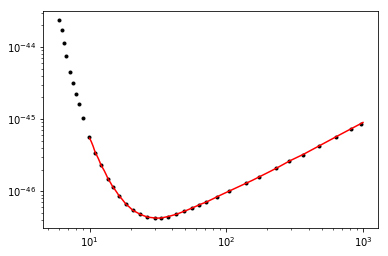

In [5]:
#CHECK: cross-section limits from XENON1t data
#GET x limits for plots
maximum=1000.
x_data = np.arange(10, maximum, .1)

DAMA_1_x_data = np.arange(2.68E+01, 9.17E+01, .01)
DAMA_2_x_data = np.arange(5.51E+00, 1.44E+01, .01)
neut_x_data = np.arange(.1, maximum, .1)

excl_1_x_data = np.arange(.16, 1.5, .0001)
excl_2_x_data = np.arange(max(excl_1_x_data), min(x_data), .0001)

#y_data = vInterpolate_Xsection(x_data, Xe1t_WIMP_mass_array, Xe1t_XSection_array)
y_data_list = []
for i in range(0, len(x_data)):
    y_data_list.append( Interpolate_Xsection(x_data[i], Xe1t_WIMP_mass_array, Xe1t_XSection_array) )
y_data = np.asarray(y_data_list)
for i in range(0,10):#len(x_data)):
    print Interpolate_Xsection(x_data[i], Xe1t_WIMP_mass_array, Xe1t_XSection_array)
    
sCDMS_x_data = np.arange(.5, 10, .1)
lCDMS_x_data = np.arange(1.5, 15, .1)
CRESST_3_x_data=np.arange(.16, 10., .0001)
CRESST_2_x_data=np.arange(.5, 10, .01)

DS50_x_data=np.arange(1.8, 15, .1)

LUX17_x_data = np.arange(1.4, maximum, 1)
LUX18_x_data = np.arange(3.5, 10, .1)

figure(1)
plt.plot(Xe1t_WIMP_mass_array, Xe1t_XSection_array, '.k')
plt.plot(x_data, y_data, '-r')
plt.xscale('log')
plt.yscale('log')

In [ ]:
#Create shaded regions on SI WIMP sensitivity plot
plot_top_lim = 1e-30
plot_bot_lim = 1e-50

sCDMS_data_list = []
lCDMS_data_list = []
Xe1t_data_list = []
LUX17_data_list = []
LUX18_data_list = []
PdaX_data_list = []
CRESST_3_data_list = []
CRESST_2_data_list = []
DS50_data_list = []

LZ18_data_list = []
sCDMS_data_list = []

neut_data_list = []
floor_data_list = []

excl_top_10to1000_list = []
#LUX17_excl_data_list = []
excl_bot_10to1000_list = []

excl_1_top_data_list = []
excl_1_bot_data_list = []

excl_2_top_data_list = []
excl_2_bot_data_list = []

DAMA_1_top_data_list =[]
DAMA_1_bot_data_list =[]
DAMA_2_top_data_list =[]
DAMA_2_bot_data_list =[]


for i in range(0, len(DAMA_1_x_data)):
    DAMA_1_top_data_list.append(Interpolate_Xsection(DAMA_1_x_data[i], DAMA_1_WIMP_mass_top_array, DAMA_1_XSection_top_array))     
    DAMA_1_bot_data_list.append(Interpolate_Xsection(DAMA_1_x_data[i], DAMA_1_WIMP_mass_bot_array, DAMA_1_XSection_bot_array))     

for i in range(0, len(DAMA_2_x_data)):
    DAMA_2_top_data_list.append(Interpolate_Xsection(DAMA_2_x_data[i], DAMA_2_WIMP_mass_top_array, DAMA_2_XSection_top_array))     
    DAMA_2_bot_data_list.append(Interpolate_Xsection(DAMA_2_x_data[i], DAMA_2_WIMP_mass_bot_array, DAMA_2_XSection_bot_array))     
    
for i in range(0, len(excl_1_x_data)):
    CRESST_3 = Interpolate_Xsection(excl_1_x_data[i], CRESST_3_WIMP_mass_array, CRESST_3_XSection_array)
    CRESST_2 = Interpolate_Xsection(excl_1_x_data[i], CRESST_2_WIMP_mass_array, CRESST_2_XSection_array)
    sCDMS = Interpolate_Xsection(excl_1_x_data[i], sCDMS_WIMP_mass_array, sCDMS_XSection_array)
    
    if excl_1_x_data[i] < 4.09E-01:
        excl_1_bot_data_list.append(CRESST_3)
    else:
        excl_1_bot_data_list.append(min(sCDMS, CRESST_3, CRESST_2))
    excl_1_top_data_list.append(plot_top_lim)

for i in range(0, len(excl_2_x_data)):
    CRESST_3 = Interpolate_Xsection(excl_2_x_data[i], CRESST_3_WIMP_mass_array, CRESST_3_XSection_array)
    CRESST_2 = Interpolate_Xsection(excl_2_x_data[i], CRESST_2_WIMP_mass_array, CRESST_2_XSection_array)
    lCDMS = Interpolate_Xsection(excl_2_x_data[i], lCDMS_WIMP_mass_array, lCDMS_XSection_array) 
    DS50 = Interpolate_Xsection(excl_2_x_data[i], DS50_WIMP_mass_array, DS50_XSection_array)
    LUX17 = Interpolate_Xsection(excl_2_x_data[i], LUX17_WIMP_mass_array, LUX17_XSection_array)
    sCDMS = Interpolate_Xsection(excl_2_x_data[i], sCDMS_WIMP_mass_array, sCDMS_XSection_array)
    Xe1t=Interpolate_Xsection(excl_2_x_data[i], Xe1t_WIMP_mass_array, Xe1t_XSection_array)
    
    #if excl_2_x_data[i] < 1.8:
    #    excl_2_bot_data_list.append(min(CRESST_3, CRESST_2, lCDMS, LUX17))
    #elif excl_2_x_data[i]> 1.34:
    #    LUX17 = Interpolate_Xsection(excl_2_x_data[i], LUX17_WIMP_mass_array, LUX17_XSection_array)
    #    excl_2_bot_data_list.append(min(CRESST_3, CRESST_2, lCDMS, LUX17))
    #else:
    excl_2_bot_data_list.append(min(CRESST_3, CRESST_2, lCDMS, DS50, LUX17, sCDMS, Xe1t))
    excl_2_top_data_list.append(plot_top_lim)



for i in range(0, len(x_data)):
    Xe1t=Interpolate_Xsection(x_data[i], Xe1t_WIMP_mass_array, Xe1t_XSection_array)
    LUX17 = Interpolate_Xsection(x_data[i], LUX17_WIMP_mass_array, LUX17_XSection_array)
    #Xe1t_data_list.append( Xe1t )
    #LUX17_data_list.append( LUX17 )
    #LZ18_data_list.append( Interpolate_Xsection(x_data[i], LZ18_WIMP_mass_array, LZ18_XSection_array) )
    #PdaX_data_list.append( Interpolate_Xsection(x_data[i], PdaX_WIMP_mass_array, PdaX_XSection_array) )
    excl_top_10to1000_list.append(plot_top_lim)
    ##LUX17_excl_data_list.append(plot_top_lim)
    
    excl_bot_10to1000_list.append( min([Xe1t, LUX17]) )



for i in range(0, len(neut_x_data)):
    neut_data_list.append( Interpolate_Xsection(neut_x_data[i], neut_WIMP_mass_array, neut_XSection_array) )
    floor_data_list.append(0.)

#for i in range(0, len(LUX18_x_data)):
#    LUX18_data_list.append( Interpolate_Xsection(LUX18_x_data[i], LUX18_WIMP_mass_array, LUX18_XSection_array) )
    
#for i in range(0, len(lCDMS_x_data)):
#    lCDMS_data_list.append( Interpolate_Xsection(lCDMS_x_data[i], lCDMS_WIMP_mass_array, lCDMS_XSection_array) )
    
##Xe1t_data = np.asarray(Xe1t_data_list)


#for i in range(0, len(sCDMS_x_data)):
#    sCDMS_data_list.append( Interpolate_Xsection(sCDMS_x_data[i], sCDMS_WIMP_mass_array, sCDMS_XSection_array) )
##x_data = np.arange(10, 1000, 1)


#for i in range(0, len(CRESST_3_x_data)):
#    CRESST_3_data_list.append( Interpolate_Xsection(CRESST_3_x_data[i], CRESST_3_WIMP_mass_array, CRESST_3_XSection_array) )


#for i in range(0, len(CRESST_2_x_data)):
#    CRESST_2_data_list.append( Interpolate_Xsection(CRESST_2_x_data[i], CRESST_2_WIMP_mass_array, CRESST_2_XSection_array) )


#for i in range(0, len(DS50_x_data)):
#    DS50_data_list.append( Interpolate_Xsection(DS50_x_data[i], DS50_WIMP_mass_array, DS50_XSection_array) )


In [ ]:
#PLOT   
figure(1)

plt.fill_between(excl_1_x_data, np.asarray(excl_1_top_data_list), np.asarray(excl_1_bot_data_list), color='green', alpha=1.)
plt.fill_between(excl_2_x_data, np.asarray(excl_2_top_data_list), np.asarray(excl_2_bot_data_list), color='green', alpha=1.)
plt.fill_between(x_data, np.asarray(excl_top_10to1000_list), np.asarray(excl_bot_10to1000_list), color='green', alpha=1., label="Excluded parameter space")

plt.fill_between(neut_x_data, np.asarray(neut_data_list), np.asarray(floor_data_list), color='yellow', alpha=.2)


plt.plot(XMASS_WIMP_mass_array, XMASS_XSection_array, ':b', label="XMASS '19")
plt.plot(DEAP_WIMP_mass_array, DEAP_XSection_array, ':r', label="DEAP '19")
plt.plot(LUX17_WIMP_mass_array, LUX17_XSection_array, 'r', label="LUX '17")
plt.plot(PdaX_WIMP_mass_array, PdaX_XSection_array, 'yellow', label="PandaX-II '17")
plt.plot(lCDMS_WIMP_mass_array, lCDMS_XSection_array, 'white', label="CDMSlite '16")
plt.plot(sCDMS_WIMP_mass_array, sCDMS_XSection_array, 'blue', label="SuperCDMS")
plt.plot(CRESST_3_WIMP_mass_array, CRESST_3_XSection_array, 'magenta', label="CRESST-III '17")
plt.plot(CRESST_2_WIMP_mass_array, CRESST_2_XSection_array, 'cyan', label="CRESST-II '15")
plt.plot(DS50_WIMP_mass_array, DS50_XSection_array, 'purple', label="DarkSide-50 '18")
plt.plot(Xe1t_WIMP_mass_array, Xe1t_XSection_array, 'k', label="XENON1t '18")
plt.plot(LZ18_WIMP_mass_array, LZ18_XSection_array, '--k', label="LZ (projected)")

plt.plot(neut_x_data, np.asarray(neut_data_list), 'brown', linewidth=4,label="Neutrino floor")



#plt.plot(DAMA_1_WIMP_mass_top_array, DAMA_1_XSection_top_array, '--y')
#plt.plot(DAMA_1_WIMP_mass_bot_array, DAMA_1_XSection_bot_array, '--w')

#plt.plot(DAMA_2_WIMP_mass_top_array, DAMA_2_XSection_top_array, '--y')
#plt.plot(DAMA_2_WIMP_mass_bot_array, DAMA_2_XSection_bot_array, '--w')

#plt.plot(DAMA_1_x_data, DAMA_1_top_data_list, '-y')
#plt.plot(DAMA_1_x_data, DAMA_1_bot_data_list, '-w')
#plt.plot(DAMA_2_x_data, DAMA_2_top_data_list, '-y')
#plt.plot(DAMA_2_x_data, DAMA_2_bot_data_list, '-w')

plt.fill_between(DAMA_1_x_data, np.asarray(DAMA_1_top_data_list), np.asarray(DAMA_1_bot_data_list), color='k', alpha=.1, label="DAMA")
plt.fill_between(DAMA_2_x_data, np.asarray(DAMA_2_top_data_list), np.asarray(DAMA_2_bot_data_list), color='k', alpha=.1)


#plt.plot(neut_x_data, np.asarray(floor_data_list), '--y')

plt.xscale('log')
plt.yscale('log')
plt.ylim(5e-50,2e-31)
plt.xlim(1.6e-1,1000.)
plt.xlabel("WIMP mass [GeV/c$^2$]", fontsize=18,family='serif')
plt.ylabel('WIMP-nucleon cross section [cm$^2$]', fontsize=18,family='serif')
pyplot.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(1.498,1.5005)

In [ ]:
print max(CRESST_3_WIMP_mass_array)

In [ ]:
print CRESST_2_x_data[0]

In [ ]:
print max(excl_1_x_data)
print min(excl_2_x_data)+1e-15

In [ ]:
print min(LUX17_WIMP_mass_array)

In [ ]:
print min(DAMA_1_WIMP_mass_top_array)
print max(DAMA_1_WIMP_mass_top_array)

print min(DAMA_1_WIMP_mass_bot_array)
print max(DAMA_1_WIMP_mass_bot_array)

In [ ]:
print min(DAMA_2_WIMP_mass_top_array)
print max(DAMA_2_WIMP_mass_top_array)

print min(DAMA_2_WIMP_mass_bot_array)
print max(DAMA_2_WIMP_mass_bot_array)

In [ ]:
print len(DAMA_1_WIMP_mass_bot_array)#, DAMA_1_XSection_bot_array

for i in range(0, 20):#len(DAMA_1_WIMP_mass_bot_array)):
    print DAMA_1_WIMP_mass_bot_array[i]

In [ ]:
print len(DAMA_1_bot_data_list)
print DAMA_1_bot_data_list

In [ ]:
arr = np.array([0,1,2,3,4,5])
reversed_arr = arr[::-1]

print arr
print reversed_arr